In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score, silhouette_score
)
import seaborn as sns
import matplotlib.pyplot as plt


In [12]:
df = pd.read_csv("/Users/behjiayi/Documents/GitHub/InnovationProject/data/EDA/Cleaned_combined_malware_dataset.csv")
df.head()

,Unnamed: 0,type,malice,generic,trojan,ransomware,worm,backdoor,spyware,rootkit,encrypter,downloader,label
0,0,0,0.883721,0.428571,0.428571,1.304633,0.352157,-0.335018,-0.127166,-0.222028,0.085714,-0.299107,1
1,1,0,0.900763,0.527027,0.378378,1.220664,-0.430986,0.087992,-0.127166,-0.222028,0.040541,-0.310532,1
2,2,0,0.925373,0.178571,0.500000,8.165629,0.221633,-0.335018,-0.127166,-0.222028,0.047619,1.074720,1
3,3,0,0.863636,0.453125,0.546875,-0.248800,-0.430986,-0.335018,-0.127166,-0.222028,0.000000,-0.510465,1
4,4,0,0.903704,0.561644,0.438356,-0.248800,-0.430986,-0.335018,-0.127166,-0.222028,0.000000,-0.510465,1


In [13]:
X = df.drop(columns=["type", "label"])  # use relevant numeric features only
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [14]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)

print("Logistic Regression Report:\n", classification_report(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, y_pred_lr))


Logistic Regression Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       216
           1       1.00      1.00      1.00      2169

    accuracy                           1.00      2385
   macro avg       1.00      1.00      1.00      2385
weighted avg       1.00      1.00      1.00      2385

ROC AUC: 1.0


In [15]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Report:\n", classification_report(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_pred_rf))


Random Forest Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       216
           1       1.00      1.00      1.00      2169

    accuracy                           1.00      2385
   macro avg       1.00      1.00      1.00      2385
weighted avg       1.00      1.00      1.00      2385

ROC AUC: 1.0


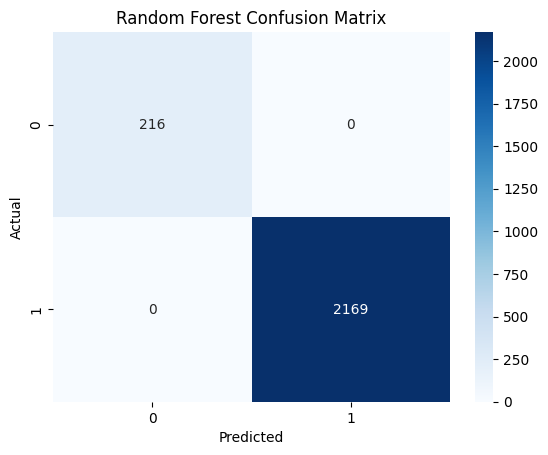

In [16]:
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Blues")
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [17]:
kmeans = KMeans(n_clusters=2, random_state=42)
cluster_labels = kmeans.fit_predict(X)

print("K-Means Silhouette Score:", silhouette_score(X, cluster_labels))


K-Means Silhouette Score: 0.6403618618968208
